# finalProjectGrouping1_filter
將Ntu_Order的失敗訂單濾除，再做一次一樣的分析。

In [2]:
import pandas as pd
df_NtuOrderOri = pd.read_csv('data/Ntu_Orders.csv')

留下訂單完成

In [3]:
df_NtuOrderOri_Fin = df_NtuOrderOri[df_NtuOrderOri['SalesOrderSlaveStatusDef']=='Finish']
df_NtuOrderOri_Fin['SalesOrderSlaveStatusDef'].head(10)

0    Finish
1    Finish
2    Finish
3    Finish
4    Finish
5    Finish
6    Finish
7    Finish
8    Finish
9    Finish
Name: SalesOrderSlaveStatusDef, dtype: object

新增三個欄位：
* promotionDiscUse: 計算使用promotion的數量，若PromotionDiscount小於零則設為1。
* EcouponDisUse: 計算使用ecoupon的數量，若EcouponDiscount小於零則設為1。
* orderSum: 計算訂單量，全部設為1。

In [4]:
df_NtuOrderOri_Fin['promotionDiscUse'] = 0
df_NtuOrderOri_Fin['promotionDiscUse'][df_NtuOrderOri_Fin['PromotionDiscount']<0] = 1
df_NtuOrderOri_Fin['EcouponDisUse'] = 0
df_NtuOrderOri_Fin['EcouponDisUse'][df_NtuOrderOri_Fin['EcouponDiscount']<0] = 1
df_NtuOrderOri_Fin['orderSum'] = 1
df_NtuOrderOri_Fin.head()

/home/sopper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sopper/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sopper/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_i

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,promotionDiscUse,EcouponDisUse,orderSum
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,1,0,1
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,1,0,1
2,26767644,20170101,C8B989DB-05F9-42D3-BD4F-E203482C5E58,26825136,1317,10118,b'\x1d\x8f}\x12lu>.&\xfc\xbc\xe0\xd2\xad\xe5\x...,Web,Brand,Mobile,...,316.0,2017-01-01 17:21:32.113,Finish,Family,Family,NaN,False,1,0,1
3,26780512,20170101,C39E36F7-5091-48DA-BE8F-8CE043E009EE,26837997,1317,10036,"b'&QI#u)\xf8\xf7\n6\x01~\xd1\xf3,\x1f\xb8\xe3\...",Web,Brand,Mobile,...,483.0,2017-01-01 21:41:58.153,Finish,Family,Family,NaN,False,1,0,1
4,26823950,20170102,7D87099A-B49C-4136-A8E9-F76BB5588B19,26881442,1317,10268,b'\xfd\x0b\x9ee\xdc\xaea@\x102;jX\xfek\x99m\x1...,Web,Brand,Mobile,...,401.0,2017-01-02 15:37:33.610,Finish,Family,Family,NaN,False,1,0,1


接著以memberid做groupby sum

In [5]:
data = df_NtuOrderOri_Fin.groupby('MemberId')['promotionDiscUse', 'EcouponDisUse', 'orderSum', 'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment'].sum()
df_NOOri_Fin_byMemId = pd.DataFrame(data)
df_NOOri_Fin_byMemId.head()

,promotionDiscUse,EcouponDisUse,orderSum,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment
MemberId,,,,,,
00002962-4E01-4D5B-A23C-AF05A965212E,18,0,19,-516.0,0.0,5542.0
000037B9-82D7-4F41-A748-FD64AF00A535,5,0,5,-100.0,0.0,1196.0
00004BE7-17B5-4DA8-A31D-673BCD22F018,0,0,1,0.0,0.0,316.0
00008557-6564-46EB-8B00-70D3DEE91FF0,0,2,2,0.0,-150.0,699.0
000248F1-4864-40B7-A987-E27884C0971C,0,0,3,0.0,0.0,597.0


將折扣取abs

In [6]:
df_NOOri_Fin_byMemId = df_NOOri_Fin_byMemId.abs()
df_NOOri_Fin_byMemId.head()

,promotionDiscUse,EcouponDisUse,orderSum,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment
MemberId,,,,,,
00002962-4E01-4D5B-A23C-AF05A965212E,18.0,0.0,19.0,516.0,0.0,5542.0
000037B9-82D7-4F41-A748-FD64AF00A535,5.0,0.0,5.0,100.0,0.0,1196.0
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.0,0.0,1.0,0.0,0.0,316.0
00008557-6564-46EB-8B00-70D3DEE91FF0,0.0,2.0,2.0,0.0,150.0,699.0
000248F1-4864-40B7-A987-E27884C0971C,0.0,0.0,3.0,0.0,0.0,597.0


新增兩個欄位：
* actOrderPercent(%) = (PromotionDisUse+EcouponDisUse/orderSum)*100
* payDCPercent(%) = (PromotionDiscount+EcouponDiscount)/(PromotionDiscount+EcouponDiscount+SalesOrderSlaveTotalPayment)*100

In [7]:
df_NOOri_Fin_byMemId['payDCPercent(%)'] = 100 * (df_NOOri_Fin_byMemId['PromotionDiscount']+df_NOOri_Fin_byMemId['EcouponDiscount'])/(df_NOOri_Fin_byMemId['SalesOrderSlaveTotalPayment']+df_NOOri_Fin_byMemId['PromotionDiscount']+df_NOOri_Fin_byMemId['EcouponDiscount'])
df_NOOri_Fin_byMemId['actOrderPercent(%)'] = 100 * (df_NOOri_Fin_byMemId['promotionDiscUse']+df_NOOri_Fin_byMemId['EcouponDisUse'])/df_NOOri_Fin_byMemId['orderSum']
df_NOOri_Fin_byMemId.head()

,promotionDiscUse,EcouponDisUse,orderSum,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,payDCPercent(%),actOrderPercent(%)
MemberId,,,,,,,,
00002962-4E01-4D5B-A23C-AF05A965212E,18.0,0.0,19.0,516.0,0.0,5542.0,8.517663,94.736842
000037B9-82D7-4F41-A748-FD64AF00A535,5.0,0.0,5.0,100.0,0.0,1196.0,7.716049,100.000000
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.0,0.0,1.0,0.0,0.0,316.0,0.000000,0.000000
00008557-6564-46EB-8B00-70D3DEE91FF0,0.0,2.0,2.0,0.0,150.0,699.0,17.667845,100.000000
000248F1-4864-40B7-A987-E27884C0971C,0.0,0.0,3.0,0.0,0.0,597.0,0.000000,0.000000


接著抽出payDCPercent(%)、actOrderPercent(%)、orderSum，繪製散點圖

In [8]:
df_percent = pd.DataFrame({
    'orderSum': df_NOOri_Fin_byMemId['orderSum'],
    'actOrderPercent(%)': df_NOOri_Fin_byMemId['actOrderPercent(%)'],
    'payDCPercent(%)': df_NOOri_Fin_byMemId['payDCPercent(%)']
})
df_percent.head()

,actOrderPercent(%),orderSum,payDCPercent(%)
MemberId,,,
00002962-4E01-4D5B-A23C-AF05A965212E,94.736842,19.0,8.517663
000037B9-82D7-4F41-A748-FD64AF00A535,100.000000,5.0,7.716049
00004BE7-17B5-4DA8-A31D-673BCD22F018,0.000000,1.0,0.000000
00008557-6564-46EB-8B00-70D3DEE91FF0,100.000000,2.0,17.667845
000248F1-4864-40B7-A987-E27884C0971C,0.000000,3.0,0.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 

matplotlib.rcParams.update({'font.size': 100})
plt.figure(figsize=(100,50))
plt.xlabel("actOrderPercent(%)")
plt.ylabel("payDCPercent(%)")
# colors = RGB(df_percent['orderSUm'],0,0)
cm = plt.cm.get_cmap('Reds')
area = np.pi * 30
sc = plt.scatter(df_percent['actOrderPercent(%)'], df_percent['payDCPercent(%)'], s=area, c=df_percent['orderSum']/2, vmin=0, vmax=35, cmap=cm, alpha=1)
plt.colorbar(sc)
plt.show()

發現須先將客戶訂單量做出分級，t再來做分級繪圖

In [10]:
df_order = pd.DataFrame({
    'orderSum': df_NOOri_Fin_byMemId['orderSum']
})
df_order.head()

,orderSum
MemberId,
00002962-4E01-4D5B-A23C-AF05A965212E,19.0
000037B9-82D7-4F41-A748-FD64AF00A535,5.0
00004BE7-17B5-4DA8-A31D-673BCD22F018,1.0
00008557-6564-46EB-8B00-70D3DEE91FF0,2.0
000248F1-4864-40B7-A987-E27884C0971C,3.0


以10訂單量為單位，製作出每增加10筆訂單的級距

如果要讓10呈現成010:  
"{0:0>3}".format(10)  
其中  
{0 : 0 > 3}  
 │   │ │ │  
 │   │ │ └─ Width of 3  
 │   │ └─ Align Right  
 │   └─ Fill with '0'  
 └─ Element index  

In [11]:
sum_Mem = len(df_order)
check = 0
index = 0
step = 1
dict_order10 = {}
while check < sum_Mem:
    temp = len(df_order[(df_order['orderSum']>index)&(df_order['orderSum']<=(index+step))])
    dict_order10['{0:0>3}~{1:0>3}'.format(index, index+step)] = temp
    index = index + step
    check = check + temp
df_order10 = pd.Series(dict_order10)
df_order10

000~001    16137
001~002    26693
002~003    35579
003~004    29996
004~005    23681
005~006    18489
006~007    14357
007~008    11267
008~009     9140
009~010     7623
010~011     6267
011~012     5080
012~013     4307
013~014     3553
014~015     3135
015~016     2650
016~017     2314
017~018     1975
018~019     1685
019~020     1512
020~021     1328
021~022     1174
022~023      999
023~024      888
024~025      772
025~026      696
026~027      649
027~028      577
028~029      545
029~030      455
           ...  
443~444        0
444~445        0
445~446        0
446~447        0
447~448        0
448~449        0
449~450        0
450~451        0
451~452        0
452~453        0
453~454        0
454~455        0
455~456        0
456~457        0
457~458        0
458~459        0
459~460        0
460~461        0
461~462        0
462~463        0
463~464        0
464~465        0
465~466        0
466~467        0
467~468        0
468~469        0
469~470        0
470~471       

發現到45筆訂單時，人數下降到100以下，接下來決定級距！

In [12]:
df_NtuOrderOri_Fin[df_NtuOrderOri_Fin['MemberId']=='725C0679-97AC-47AD-8FC5-B1C4099285BA']

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,promotionDiscUse,EcouponDisUse,orderSum
9374,34390885,20170503,725C0679-97AC-47AD-8FC5-B1C4099285BA,34450444,1317,12287,"b""G\xfaC\xf0K\xfb[Zu\x81\xeaX4\x12\xfbb.\x92\x...",Web,Brand,PC,...,242.0,2017-05-03 05:38:13.847,Finish,Family,Family,NaN,False,1,0,1
9584,34164802,20170430,725C0679-97AC-47AD-8FC5-B1C4099285BA,34224250,1317,11750,b'\x0eH\x8b\x1a9\xd6\xfb\x19\xc6\xb9g\xa4\xfa\...,Web,Brand,PC,...,0.0,2017-04-30 01:09:05.520,Finish,Family,Family,NaN,False,0,0,1
13395,34390883,20170503,725C0679-97AC-47AD-8FC5-B1C4099285BA,34450442,1317,12304,"b""G\xfaC\xf0K\xfb[Zu\x81\xeaX4\x12\xfbb.\x92\x...",Web,Brand,PC,...,222.0,2017-05-03 05:38:13.817,Finish,Family,Family,NaN,False,1,0,1
13396,34390884,20170503,725C0679-97AC-47AD-8FC5-B1C4099285BA,34450443,1317,12304,"b""G\xfaC\xf0K\xfb[Zu\x81\xeaX4\x12\xfbb.\x92\x...",Web,Brand,PC,...,222.0,2017-05-03 05:38:13.833,Finish,Family,Family,NaN,False,1,0,1
19932,49568297,20171213,725C0679-97AC-47AD-8FC5-B1C4099285BA,49631947,1317,15987,b'\xf3\x12\x93\xbe\xe9\xe1\x04\xa0\xd4\xc5I\x9...,Web,Brand,PC,...,377.0,2017-12-13 13:47:41.633,Finish,Family,Family,242.0,False,1,1,1
32573,33792190,20170424,725C0679-97AC-47AD-8FC5-B1C4099285BA,33851492,1317,11902,b'\x01\x06\x9e/\xc4\x9b\xa5\x06\xfb\x999\xc9\x...,Web,Brand,PC,...,299.0,2017-04-24 15:36:55.980,Finish,Family,Family,NaN,False,0,0,1
39086,27323148,20170110,725C0679-97AC-47AD-8FC5-B1C4099285BA,27380708,1317,1320,b'\x91\x17x9\xd8\xca\xe0\x14r\x86\xcb@\xf0\x7f...,Web,Brand,PC,...,121.0,2017-01-10 22:08:32.027,Finish,Family,Family,NaN,False,1,0,1
39087,27323150,20170110,725C0679-97AC-47AD-8FC5-B1C4099285BA,27380710,1317,6602,b'\x91\x17x9\xd8\xca\xe0\x14r\x86\xcb@\xf0\x7f...,Web,Brand,PC,...,92.0,2017-01-10 22:08:32.087,Finish,Family,Family,NaN,False,1,0,1
43893,49985861,20171219,725C0679-97AC-47AD-8FC5-B1C4099285BA,50049704,1317,16258,b'\xf0\x19l\xc0\x927Y\x1b<\x1f)\xa9\xee\x99\x0...,Web,Brand,PC,...,317.0,2017-12-19 15:30:21.280,Finish,Family,Family,NaN,False,1,0,1
43894,49985862,20171219,725C0679-97AC-47AD-8FC5-B1C4099285BA,50049705,1317,16289,b'\xf0\x19l\xc0\x927Y\x1b<\x1f)\xa9\xee\x99\x0...,Web,Brand,PC,...,713.0,2017-12-19 15:30:21.293,Finish,Family,Family,NaN,False,1,0,1


真的是400多筆，厲害厲害！

以下是分級繪圖

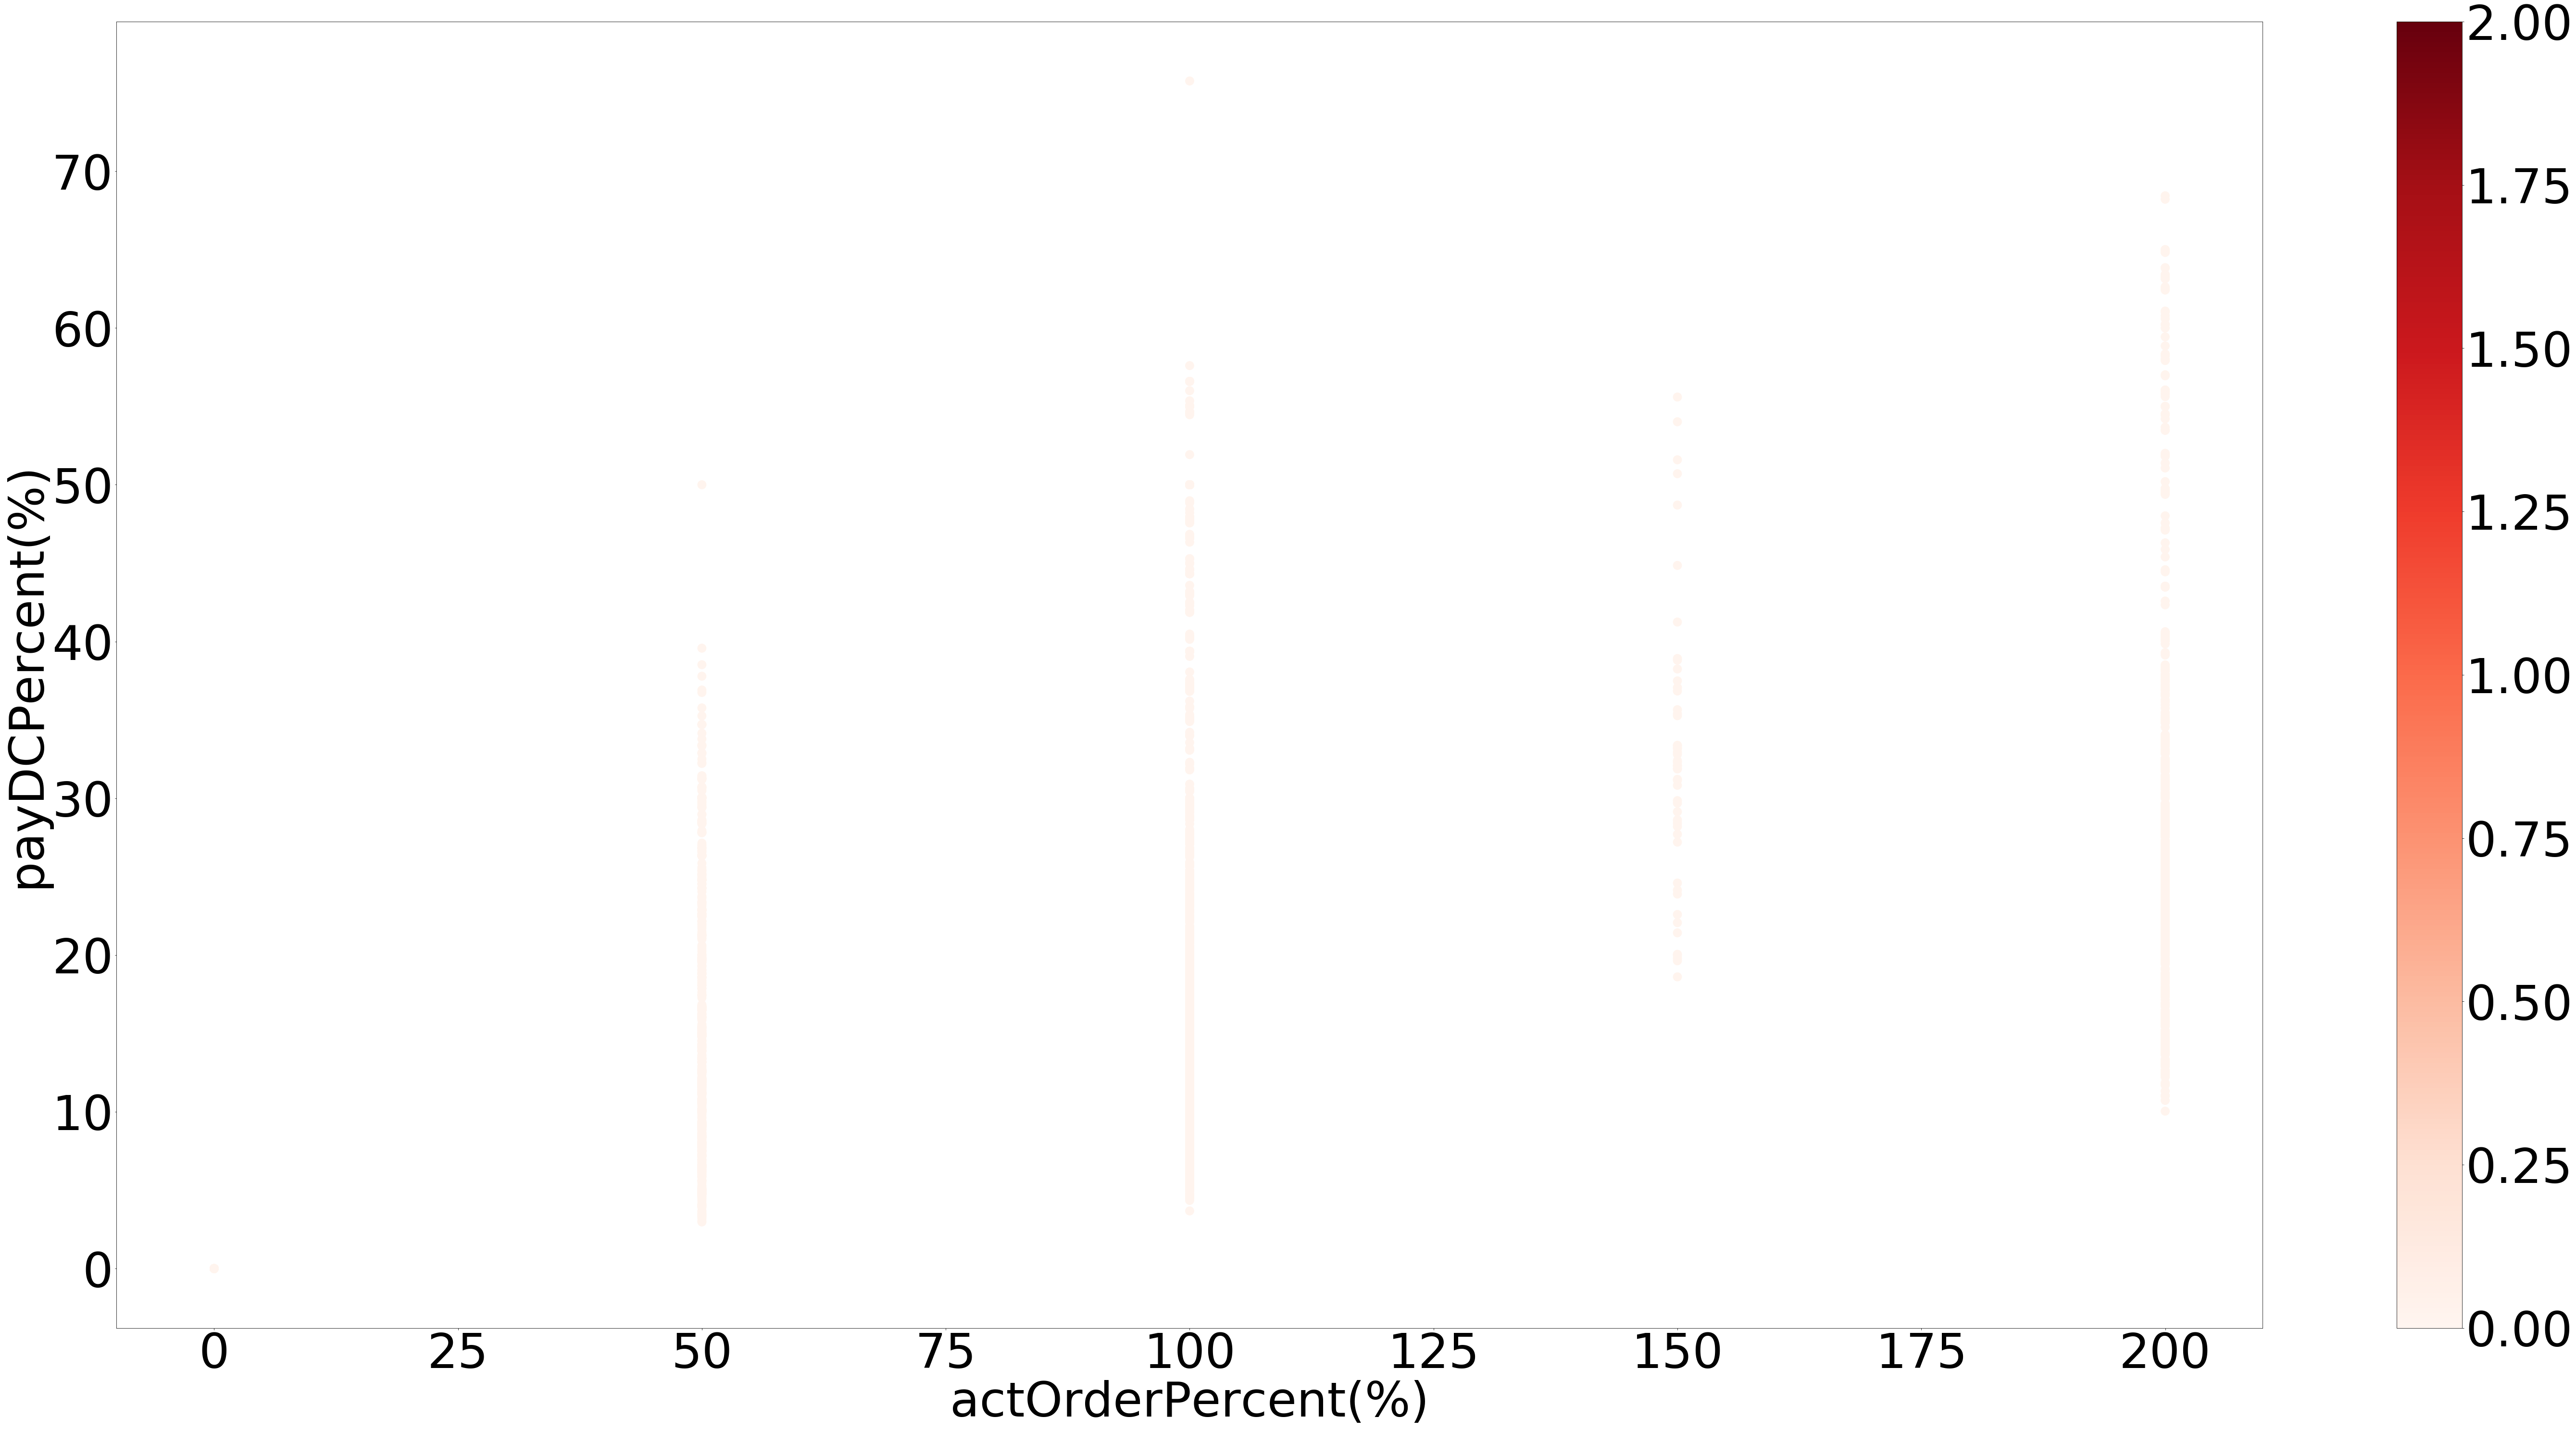

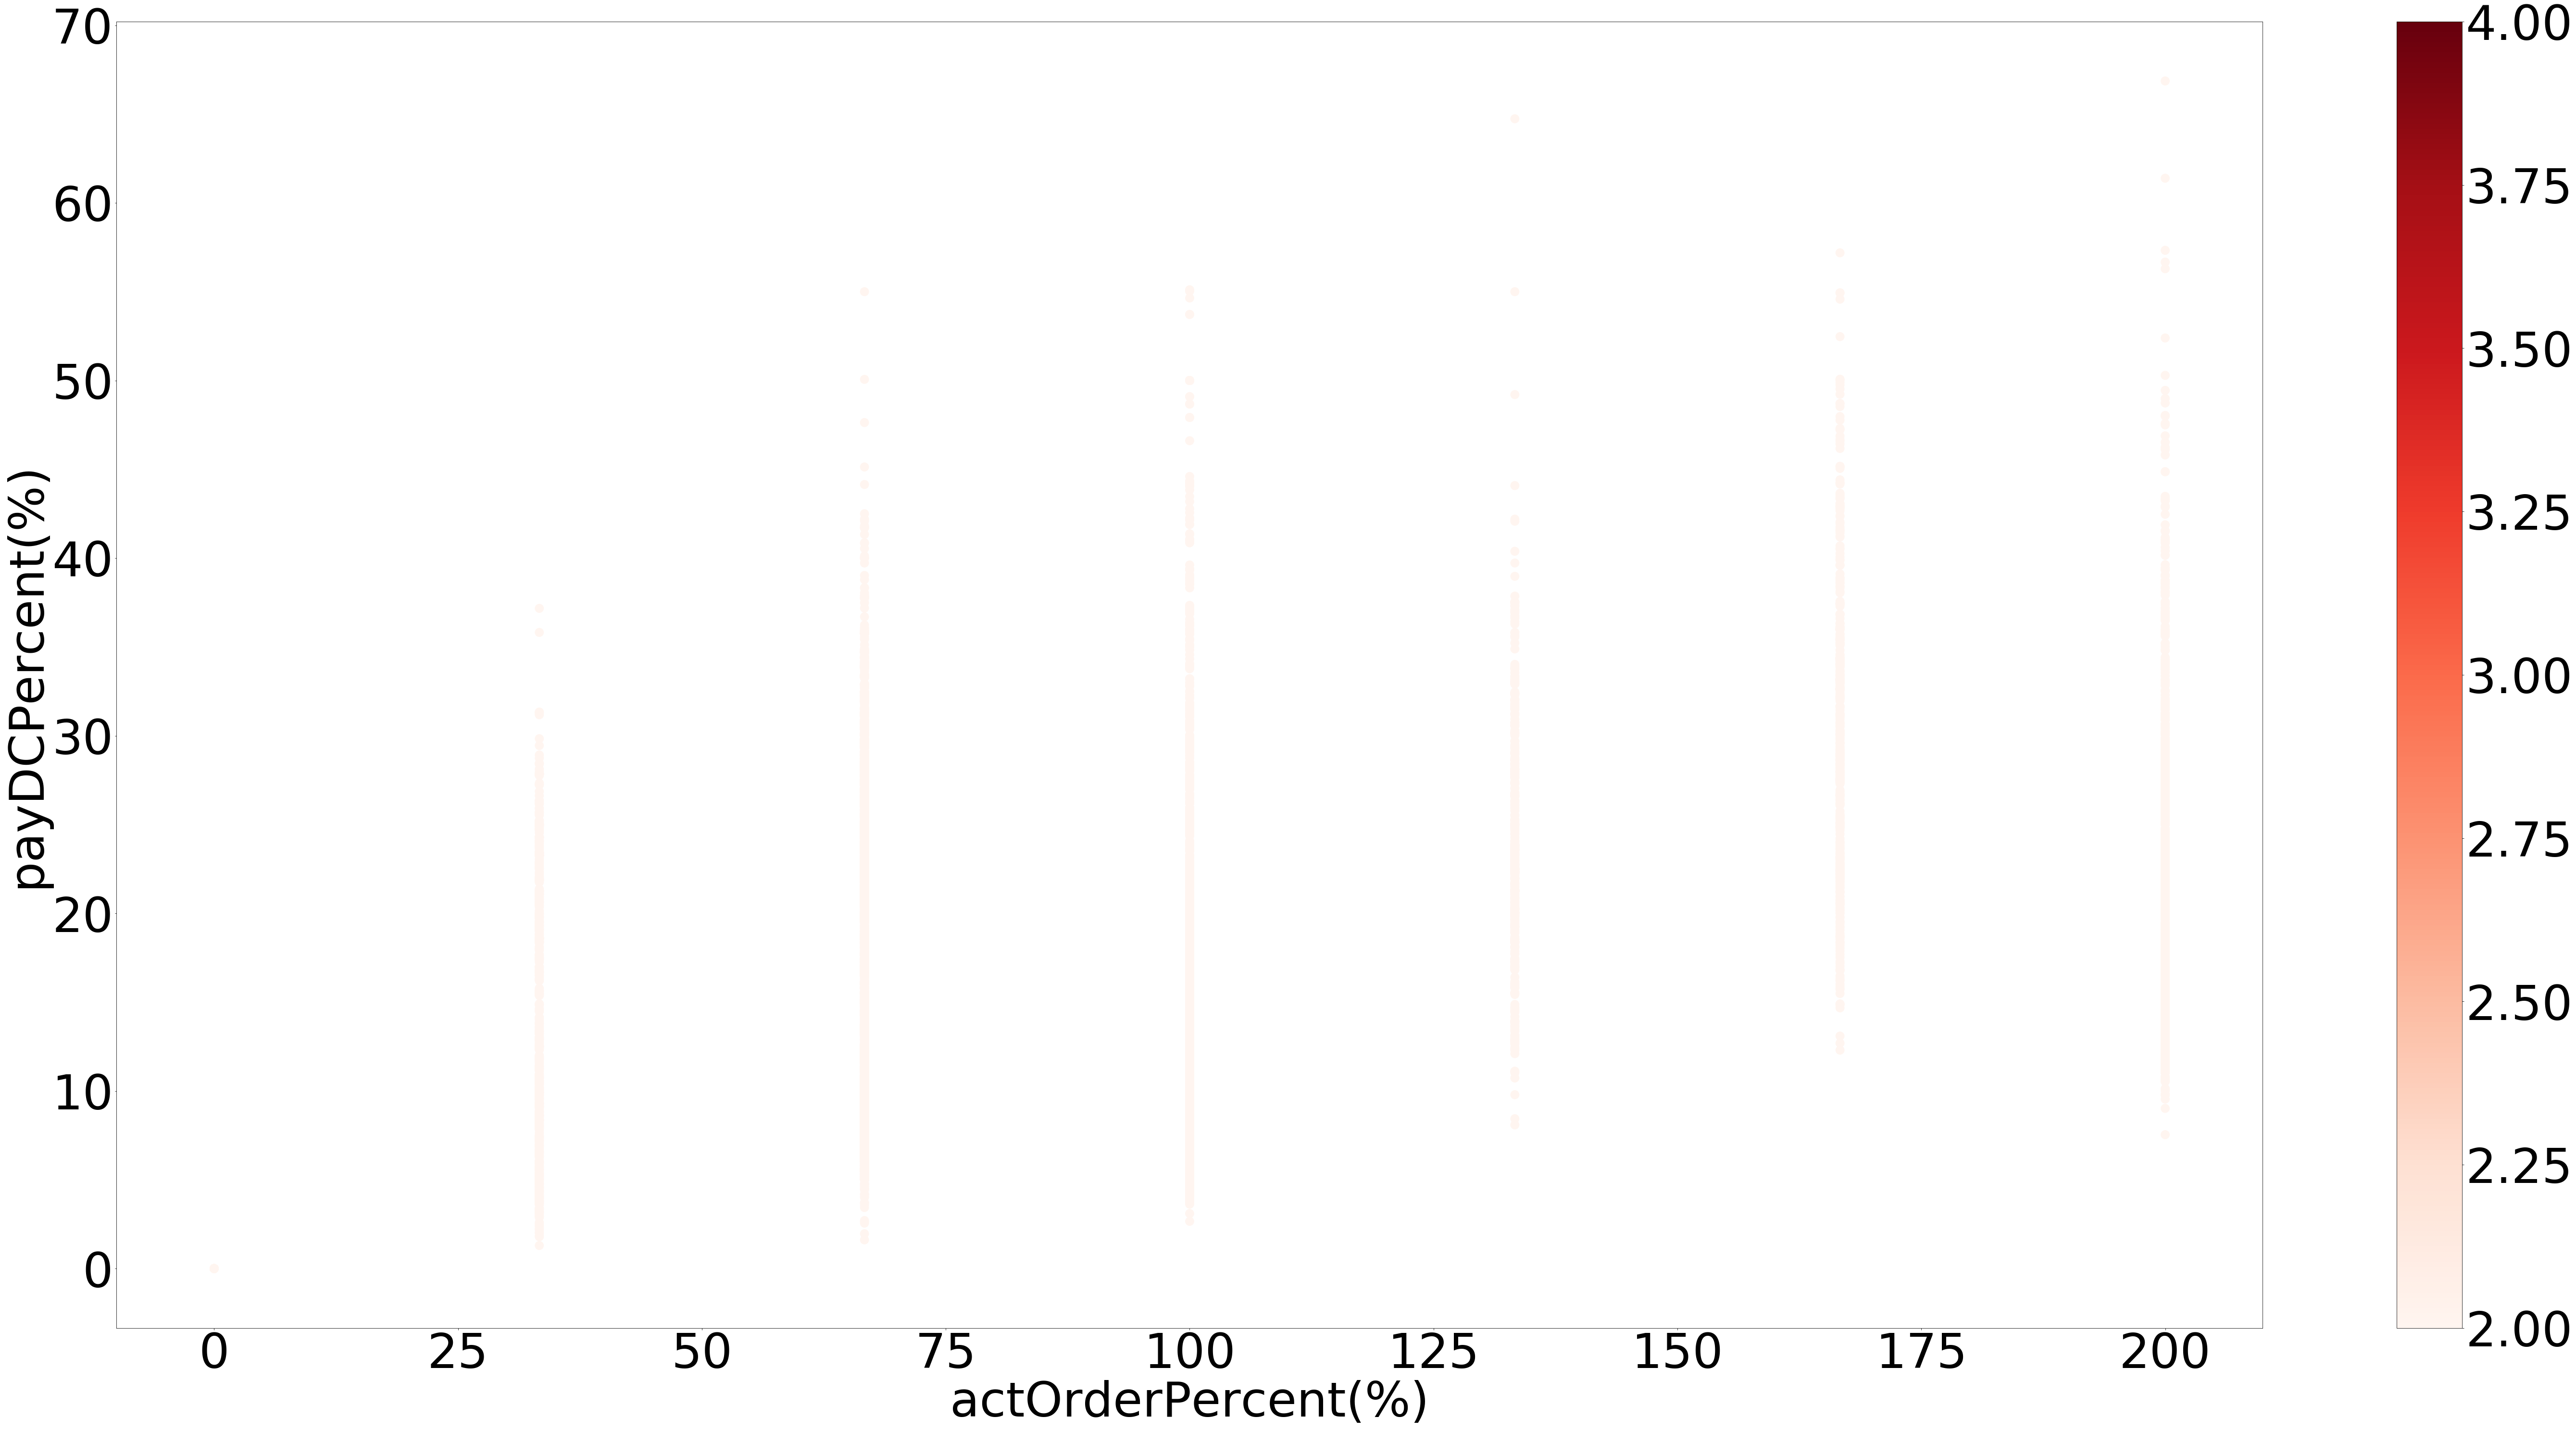

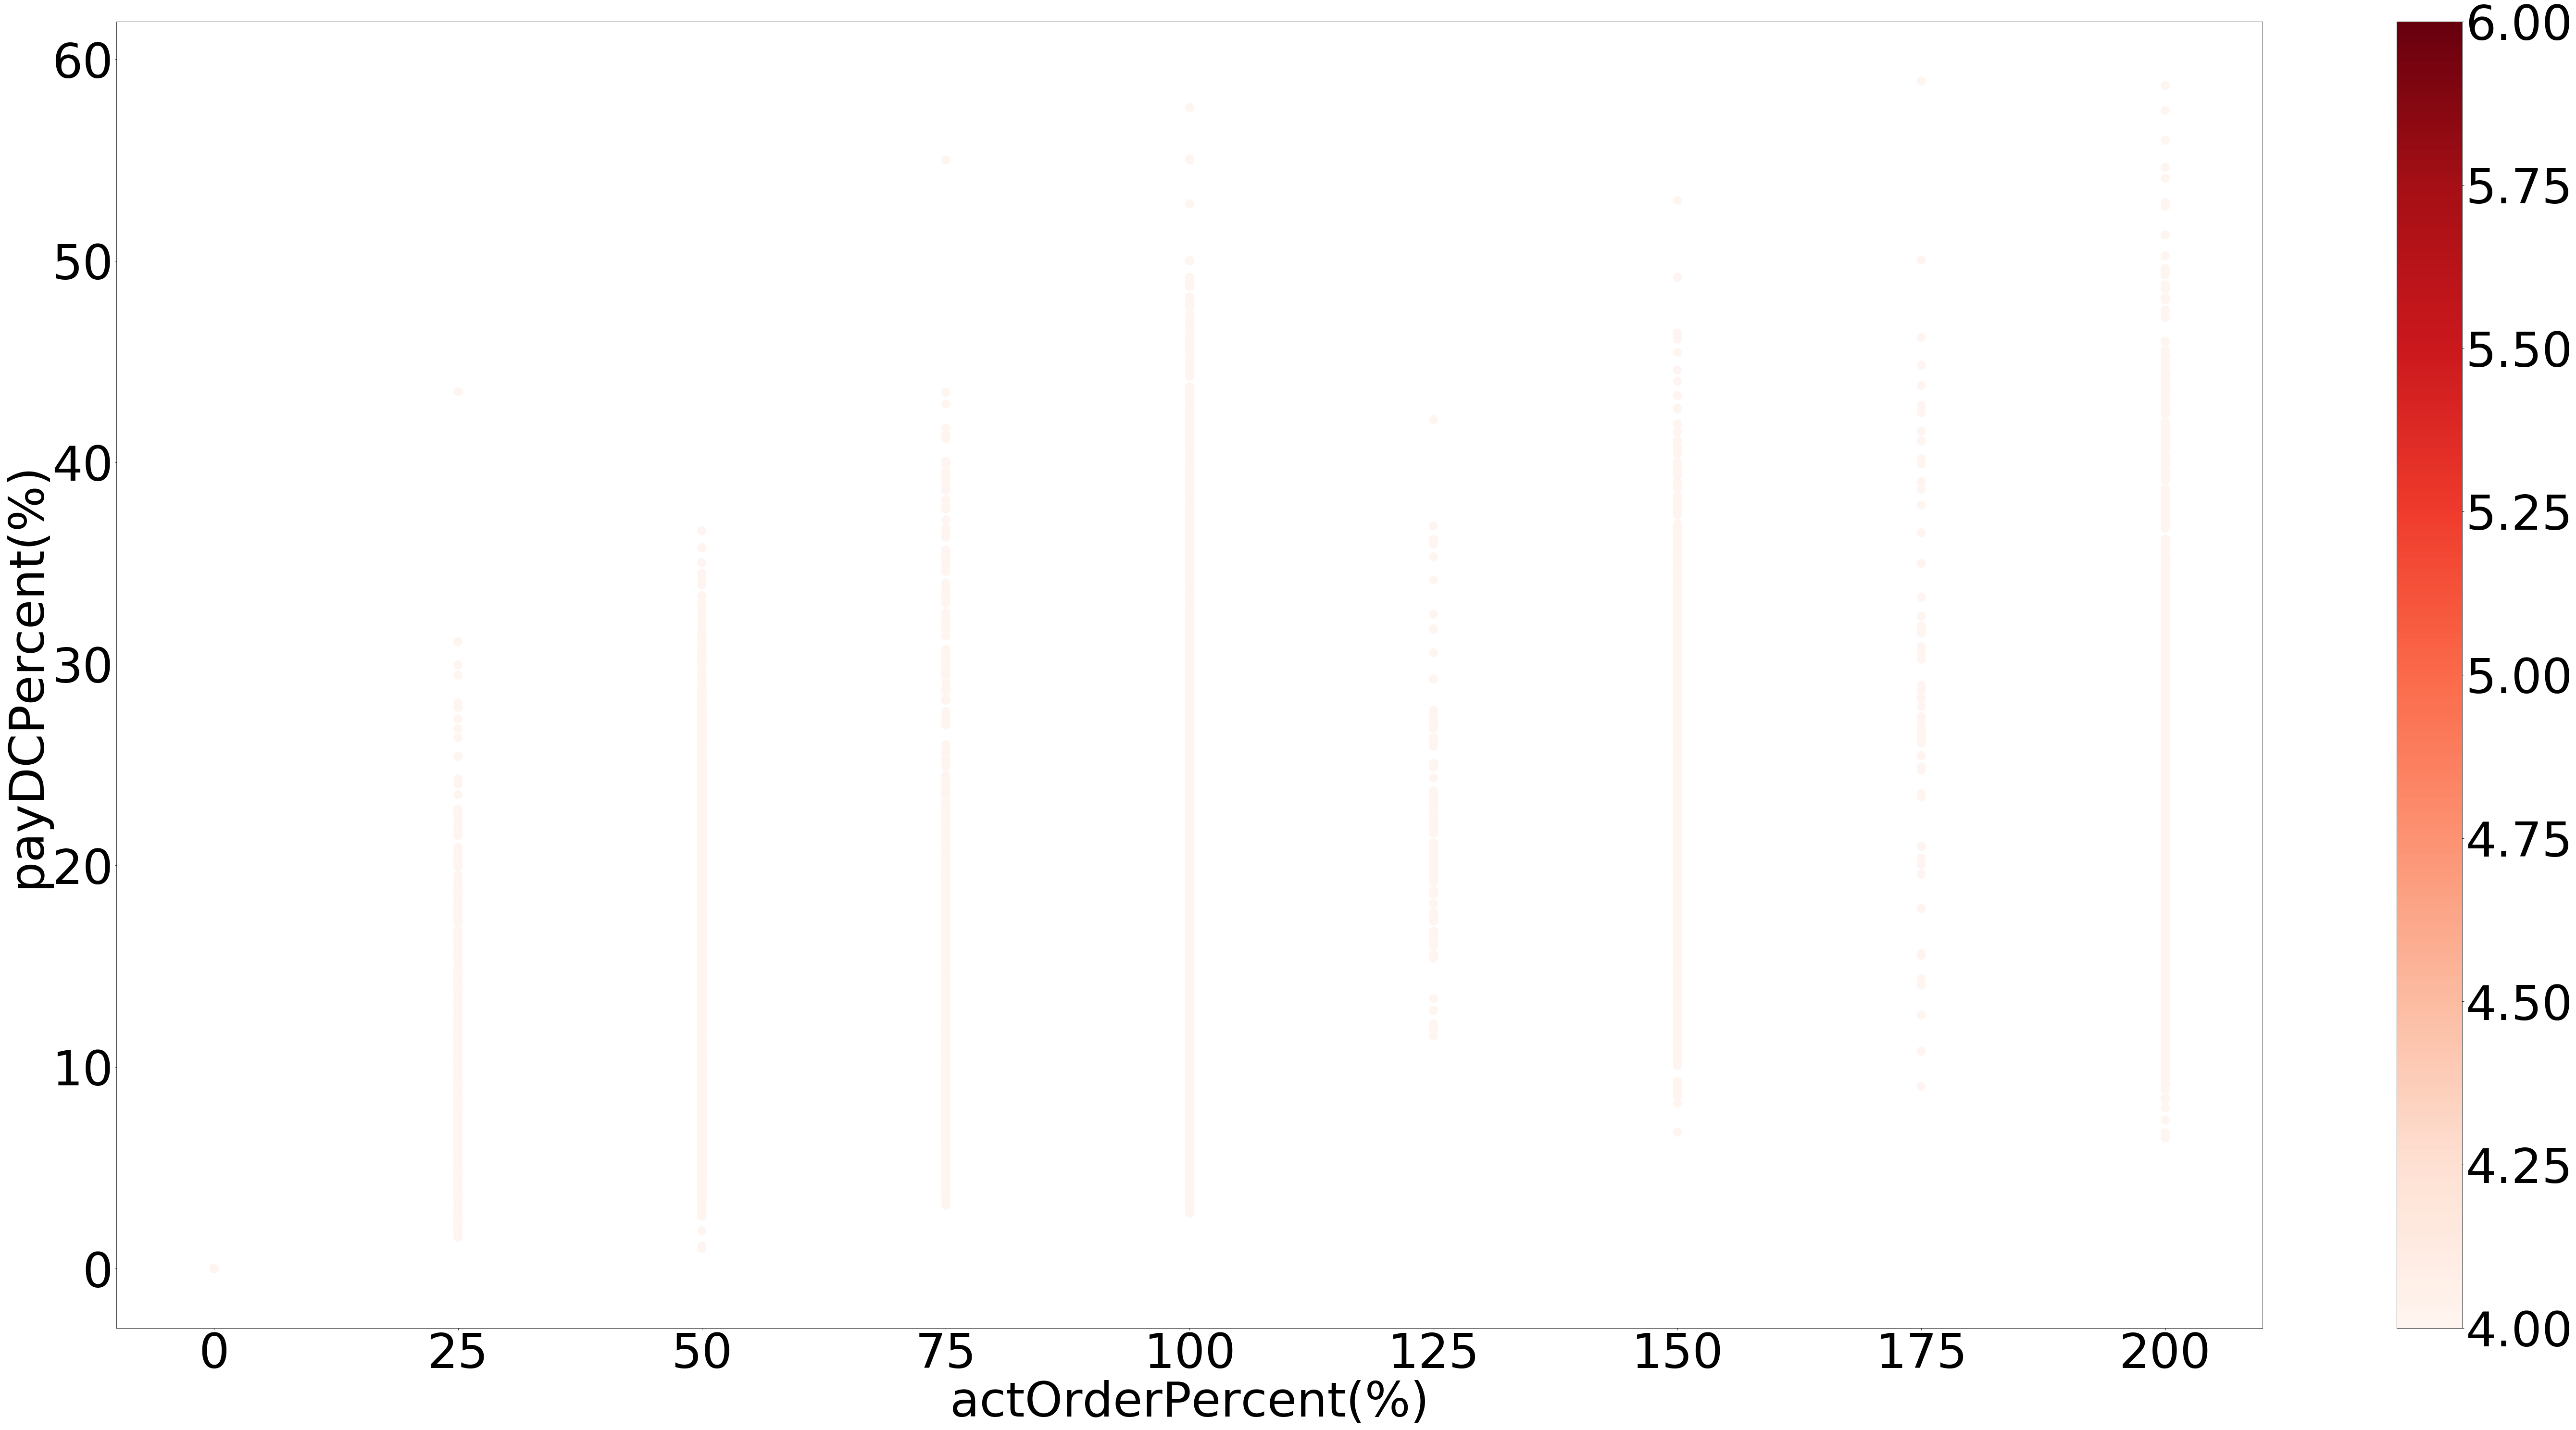

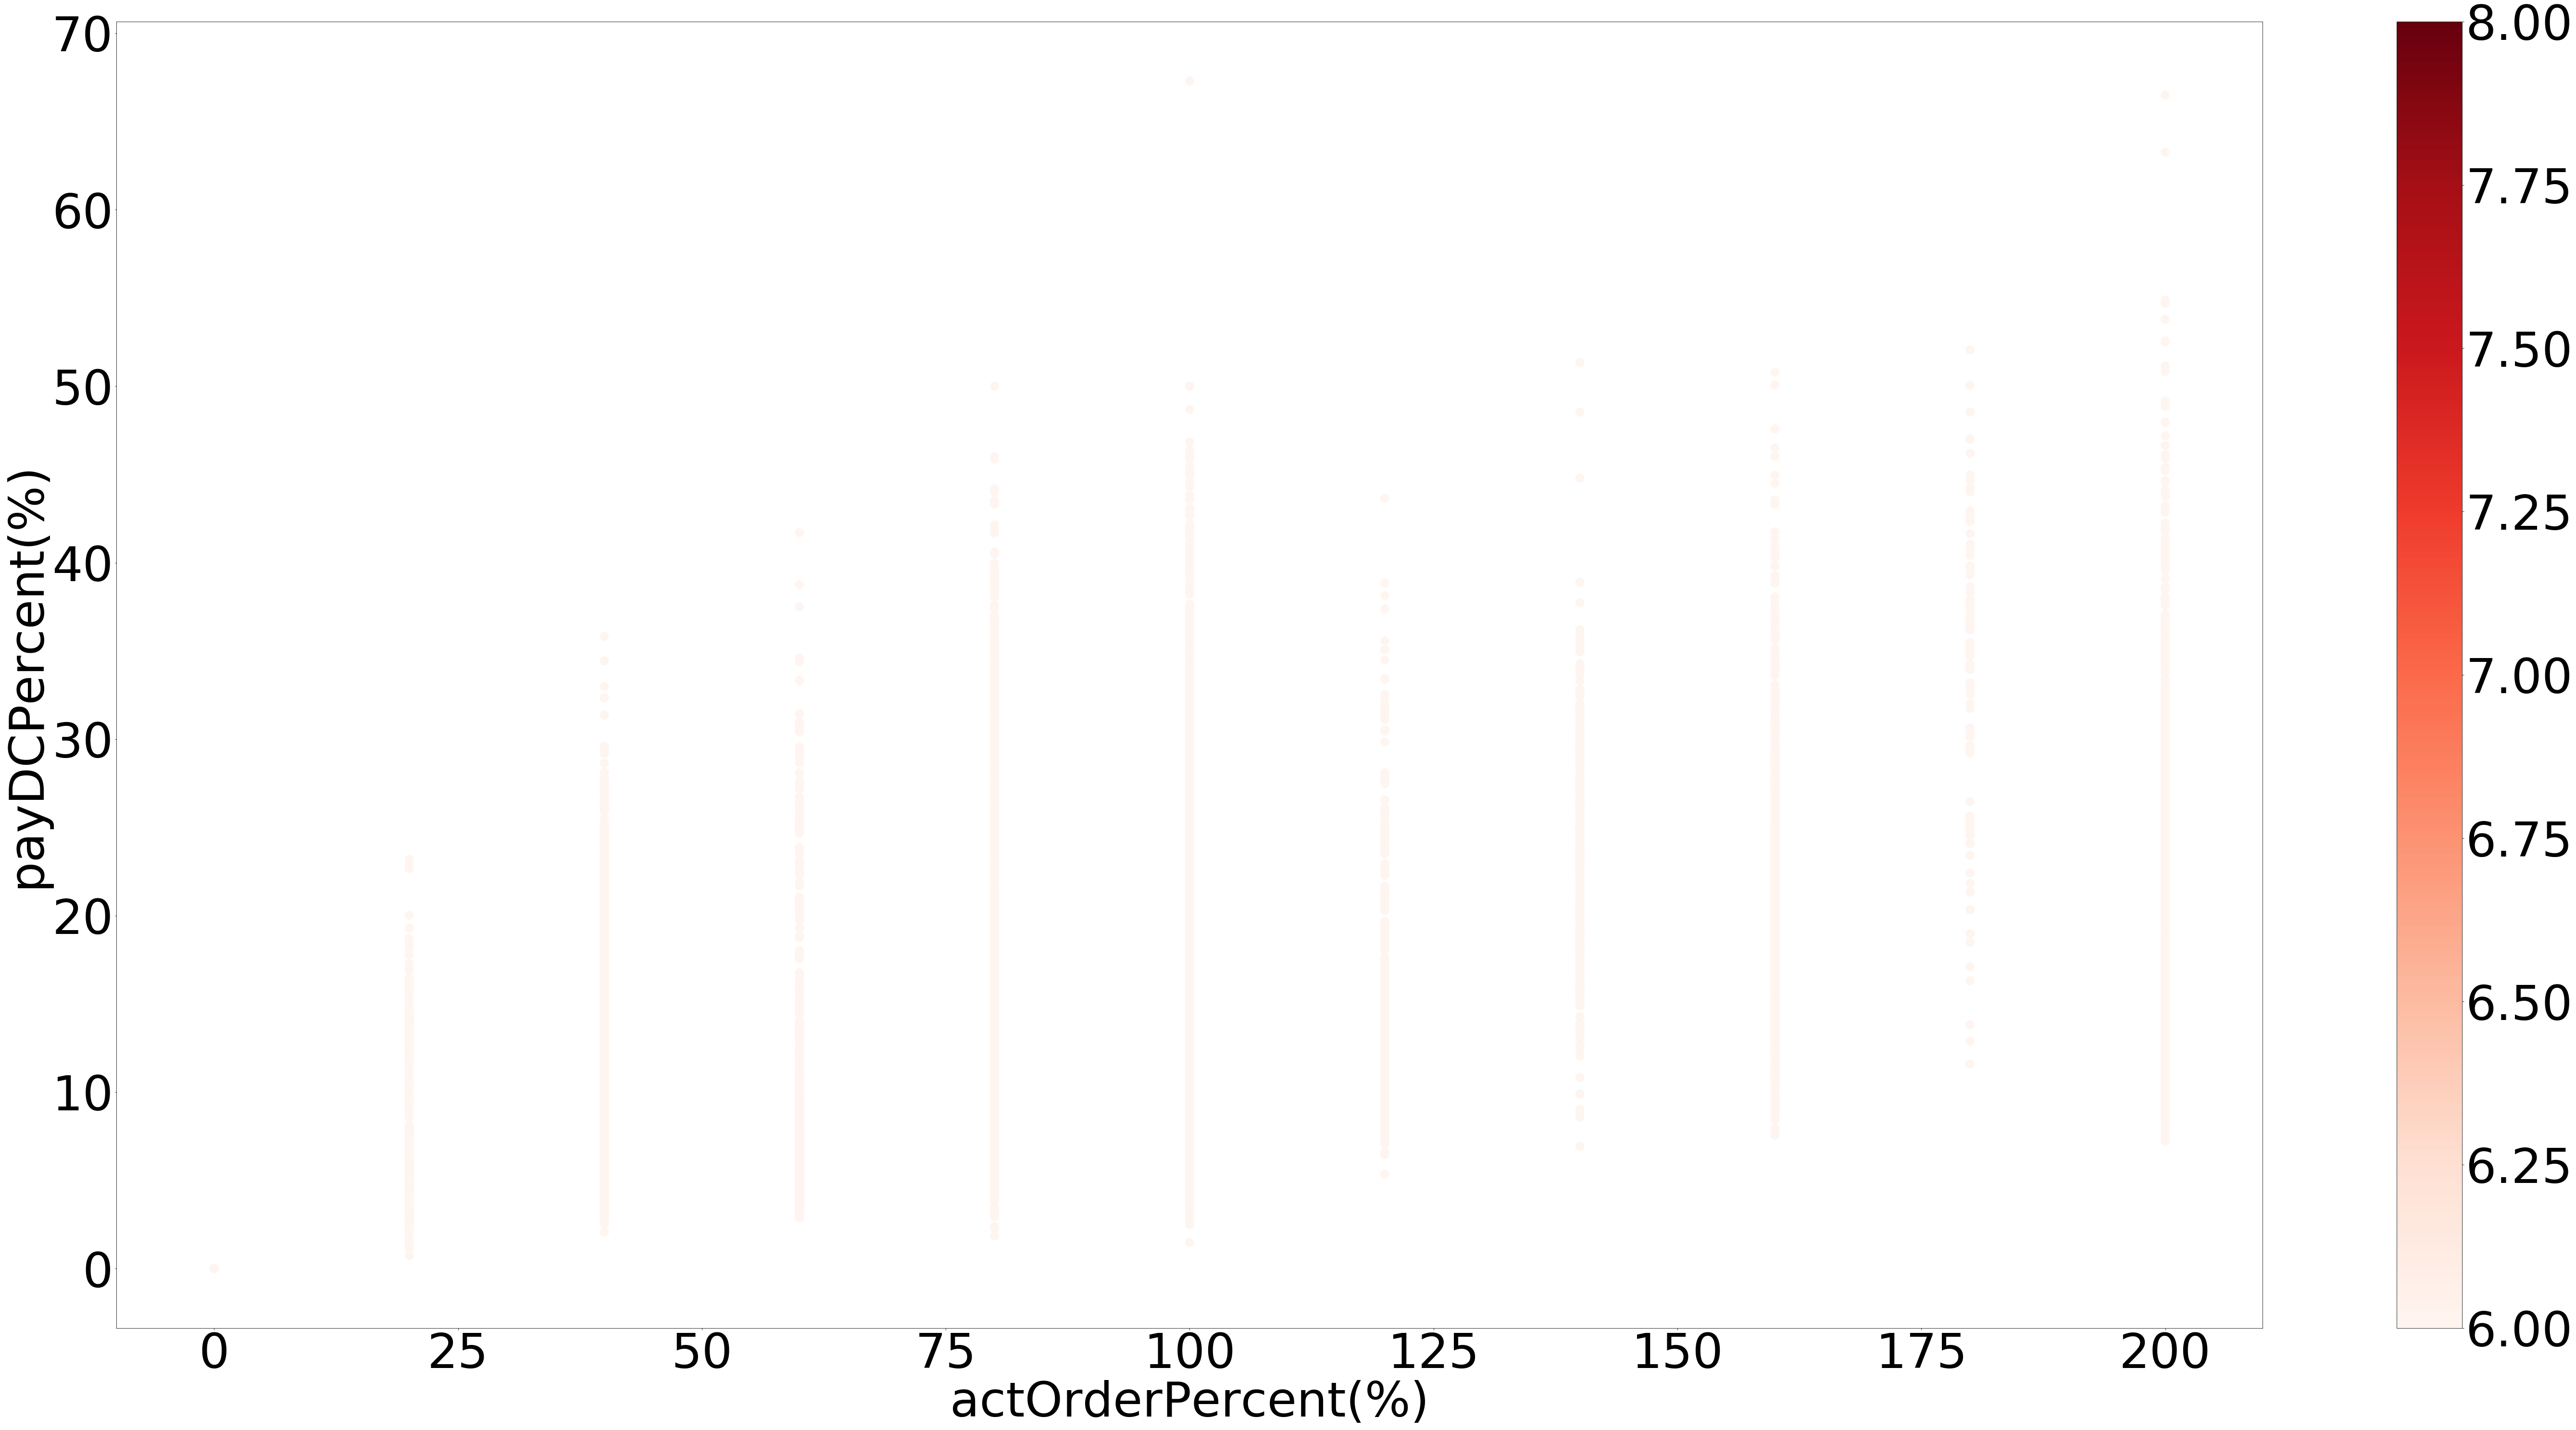

In [18]:
matplotlib.rcParams.update({'font.size': 100})
index = 0
step = 2
for i in range(1,5):
    df_percent_step = df_percent[(df_percent['orderSum']>i)&(df_percent['orderSum']<(i+2))]
    plt.figure(i)
    plt.figure(figsize=(100,50))
    plt.xlabel("actOrderPercent(%)")
    plt.ylabel("payDCPercent(%)")
    cm = plt.cm.get_cmap('Reds')
    area = np.pi * 100
    sc = plt.scatter(
        df_percent_step['actOrderPercent(%)'], 
        df_percent_step['payDCPercent(%)'], 
        s=area, 
        c=df_percent_step['orderSum']*0.01, 
        vmin=index, 
        vmax=(index+step), 
        cmap=cm, 
        alpha=1)
    plt.colorbar(sc)
    index = index + step
plt.show()

分級繪圖後發現效果不顯著，將橫軸改為orderSum，actOrderPercent(%)改為深淺。

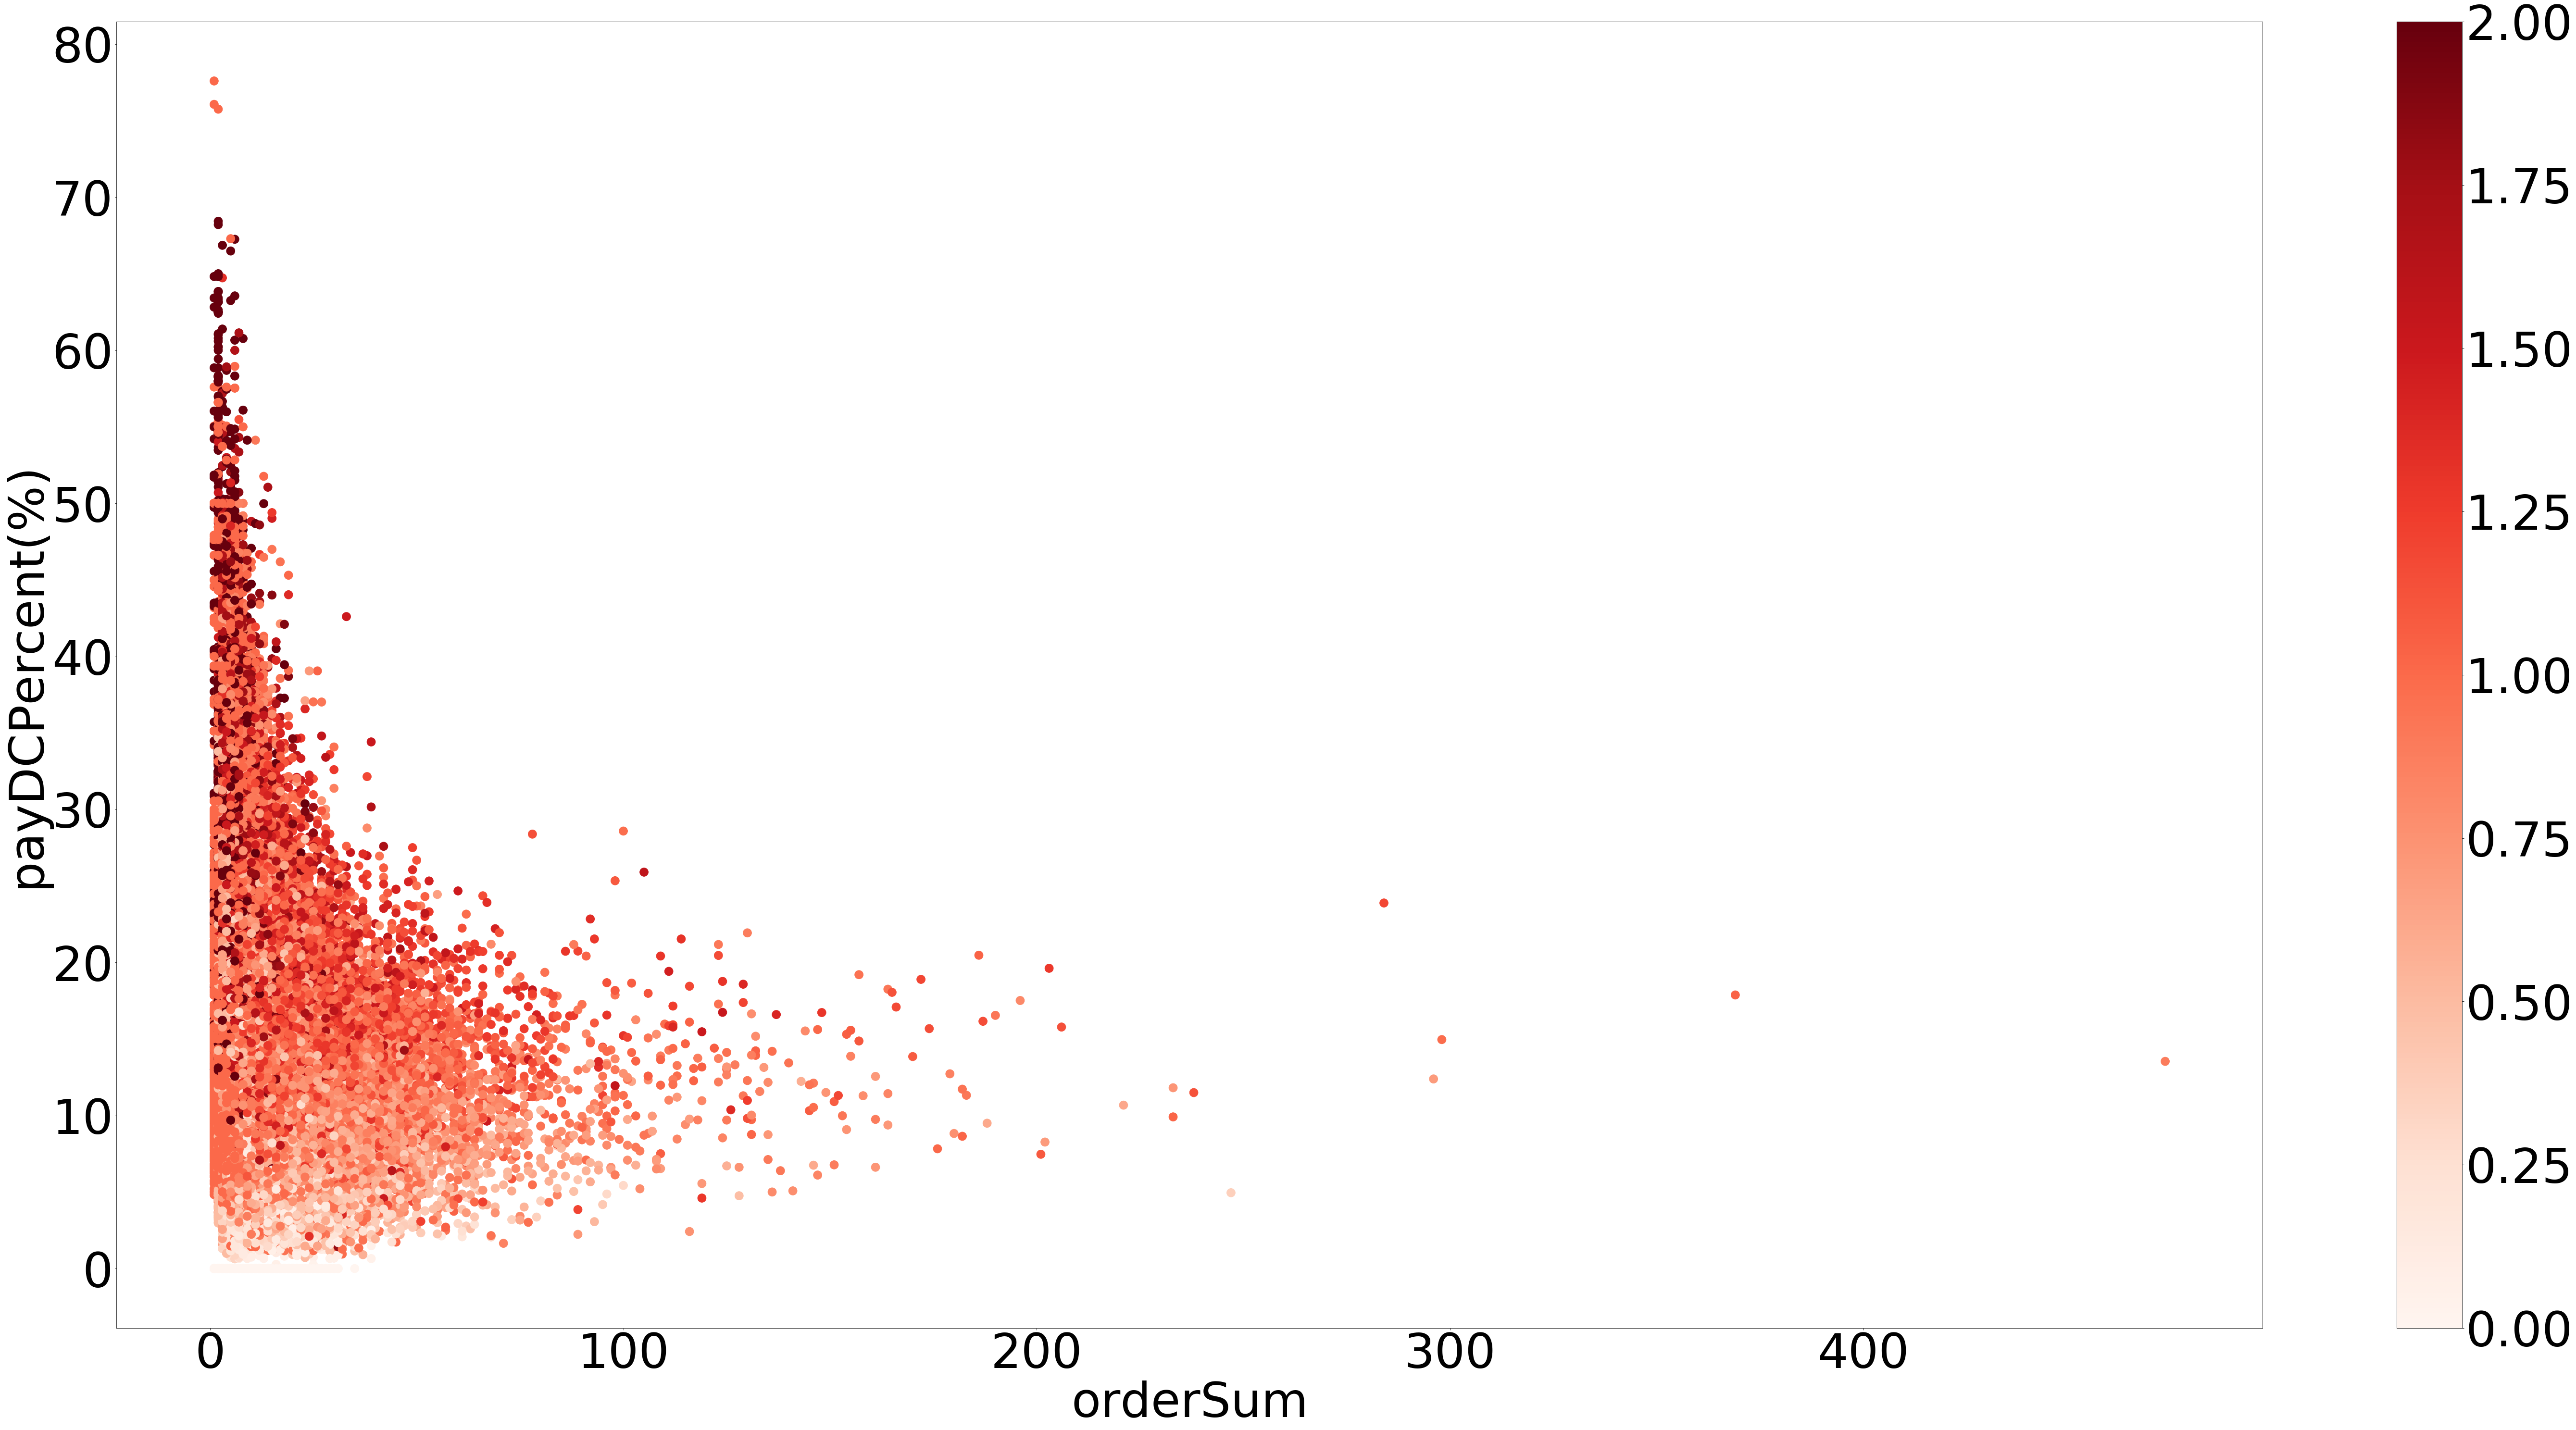

In [17]:
plt.figure(figsize=(100,50))
plt.xlabel("orderSum")
plt.ylabel("payDCPercent(%)")
cm = plt.cm.get_cmap('Reds')
area = np.pi * 100
sc = plt.scatter(
    df_percent['orderSum'], 
    df_percent['payDCPercent(%)'], 
    s=area, 
    c=df_percent['actOrderPercent(%)']*0.01,
    cmap=cm, 
    alpha=1)
plt.colorbar(sc)
plt.show()

更改x軸後，分群狀況似乎更明顯了！看來又要重作一份，不過滿值得的！